In [2]:
## First, set the project name in the 'photovoltaics.freecad.freecad' script.

import locale
locale.setlocale(locale.LC_ALL, 'pl_PL')
import sys
import re
import os
import os.path as path
import datetime
import importlib as imp
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from IPython.display import display, Markdown as md

LINEWIDTH = 2
PLOT_WIDTH = 9
FONT = {
    "family": "sans-serif",
    "weight": "light",
    "size": 12}
mpl.rc('font', **FONT)

PROJECT_DIR = None
DESIGN = None
SETUP = None
GROUPS = None
PV = None
PANEL_LAYOUT = 'kubusia_30_2100'

import os.path as path
FILE = __file__

def styles():
    STYLES = path.join(
        path.dirname(path.realpath(FILE)),
        "..", "styles", "custom.css"
    )
    return "<style>\n" + open(STYLES, "r").read() + "\n</style>"

display(md(
f'''
Working directory is {PROJECT_DIR}

To produce html output of this notebook:
```
C:\\Users\\stefa\\AppData\\Roaming\\Python\\Python310\\Scripts\\jupyter nbconvert {os.path.abspath("")}\\report.ipynb --no-input --to html --output {os.path.abspath('')}\\report.html
```
'''))

NameError: name '__file__' is not defined

In [3]:
display(md(styles()))

NameError: name 'FILE' is not defined

In [ ]:
display(md(f"""
# {DESIGN["title"]}

Zaczynamy od największej instalacji mieszczącej się na dachu. Analizujemy efektywność poszczególnych paneli i w rezultacie składamy instalację z wystarczającej liczby najbardziej efektywnych. Efektywność paneli zależy od orientacji połaci dachu na której są zamontowane i od dostępności światła słonecznego. 

Poniższy rysunek pokazuje wyjściową instalację.
"""))


# Projekt instalacji PV na domu Kubusia

Zaczynamy od największej instalacji mieszczącej się na dachu. Analizujemy efektywność poszczególnych paneli i w rezultacie składamy instalację z wystarczającej liczby najbardziej efektywnych. Efektywność paneli zależy od orientacji połaci dachu na której są zamontowane i od dostępności światła słonecznego. 

Poniższy rysunek pokazuje wyjściową instalację.


In [1]:
fig = plt.figure(figsize=(PLOT_WIDTH, PLOT_WIDTH))
PV.condition_setup_installation_view()
img = mpimg.imread(PV.image_filepath(setup.INSTALLATION_IMG))
plt.axis('off')
plt.imshow(img)
plt.show()

md(f"""
>   Dach budynku instalacji. Projekt uwzględnia zacienienie paneli od sąsiedniego dachu. Także pobliskie wysokie drzewa \N{EN DASH} zielone obiekty \N{EN DASH} są włączone do modelu. Nasłonecznienie z dnia {setup.EXAMPLE_DAY} miesiąca {setup.EXAMPLE_MONTH} o godzinie {setup.EXAMPLE_HOUR}.
""")

NameError: name 'plt' is not defined

In [ ]:
display(md(f"""
## Objaśnienie metody projektowej

Podstawą projektu jest przestrzenne odwzorowanie instalacji. Ten model powstaje z przetworzenia serii fotografii uzyskanych przez użycie odpowiednio programowanego drona. Wytworzony z fotografii model 3D zostaje uzupełniony strukturą paneli fotowoltaicznych \N{EN DASH} przy użyciu dostosowanej do zadania aplikacji komputerowej typu CAD.

Model instalacji służy do prześledzenia rocznej dostępności światła słonecznego do poszczególnych paneli PV, reprezentowanych przez niebieskie prostokąty na rysunku.

Panele PV będą uszeregowane według efektywności produkcji energii: najgorsze będą odrzucone  \N{EN DASH} jeśli zostanie zapas mocy.
"""))


## Objaśnienie metody projektowej

Podstawą projektu jest przestrzenne odwzorowanie instalacji. Ten model powstaje z przetworzenia serii fotografii uzyskanych przez użycie odpowiednio programowanego drona. Wytworzony z fotografii model 3D zostaje uzupełniony strukturą paneli fotowoltaicznych – przy użyciu dostosowanej do zadania aplikacji komputerowej typu CAD.

Model instalacji służy do prześledzenia rocznej dostępności światła słonecznego do poszczególnych paneli PV, reprezentowanych przez niebieskie prostokąty na rysunku.

Panele PV będą uszeregowane według efektywności produkcji energii: najgorsze będą odrzucone  – jeśli zostanie zapas mocy.


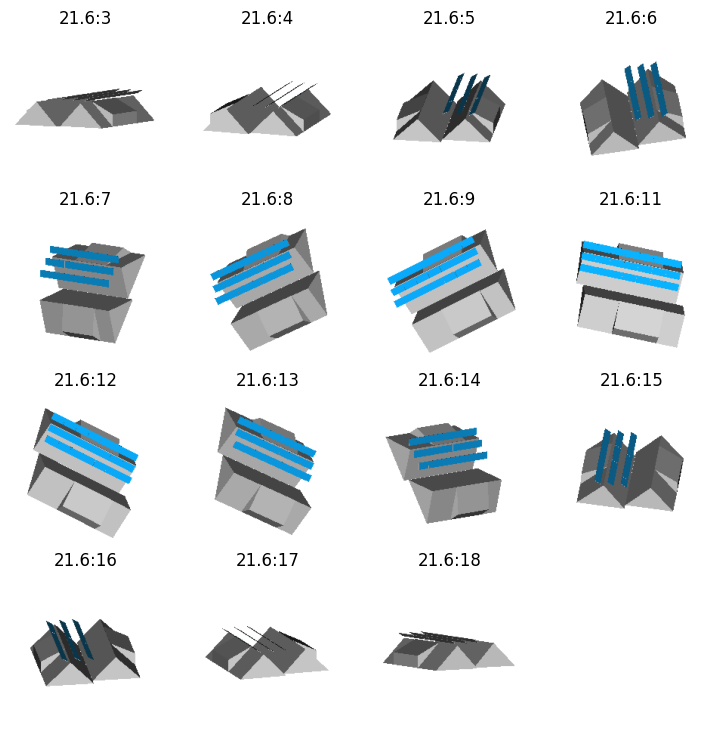


>   Instalacja PV widziana ze słońca w czasie kolejnych godzin w dniu 21. miesiąca 6.

>   Niewidoczne części paneli PV są zacienione, więc nie pracują. Także, panele odchylone od kierunku słońca (od kierunku widzenia)
 nie są efektywne. Analiza efektywności poszczególnych paneli polega więc na pomiarze (części rzutu) jego powierzchni widzianej ze słońca.

In [ ]:

regex = re.compile('[1-9]{1,2}-[1-9]{1,2}-[1-9]{1,2}-\.png')
rootdir = projectfiles.images_folder()
images = []
for root, dirs, files in os.walk(rootdir):
  for file in files:
    if regex.match(file):
       images.append(file)

def sort(image):
    chunks = image.split("-")
    return int(datetime.datetime.timestamp(
        datetime.datetime(2000, int(chunks[0]), int(chunks[1]), int(chunks[2]))))
images.sort(key=sort)

image_arrays = []
for image in images:
    image_arrays.append((image, mpimg.imread(path.join(rootdir,image))))

fig = plt.figure(figsize=(PLOT_WIDTH, PLOT_WIDTH))
columns = 4
rows = 4
for i in range(0, len(image_arrays)):
    img = image_arrays[i][1]
    splot = fig.add_subplot(rows, columns, i + 1)
    chunks = image_arrays[i][0].split("-")
    splot.set_title(
        "%s.%s:%s" % (chunks[1], chunks[0], chunks[2]), 
        fontdict={"fontsize": 12})
    plt.axis('off')
    plt.imshow(img)
plt.show()

display(md(f"""
>   Instalacja PV widziana ze słońca w czasie kolejnych godzin w dniu {setup.EXAMPLE_DAY}. miesiąca {setup.EXAMPLE_MONTH}.

>   Niewidoczne części paneli PV są zacienione, więc nie pracują. Także, panele odchylone od kierunku słońca (od kierunku widzenia)
 nie są efektywne. Analiza efektywności poszczególnych paneli polega więc na pomiarze (części rzutu) jego powierzchni widzianej ze słońca."""))

## Założenia projektu

###  Cel inwestycyjny

In [ ]:
degree = "\N{DEGREE SIGN}"
display(md(f"""
* lokalizacja geograficzna instalacji:
    * szerokość geograficzna: {DESIGN["coords"]["latitude"]:.5f}{degree}
    * długość geograficzna: {DESIGN["coords"]["longitude"]:.5f}{degree}
* roczna produkcja energii: {DESIGN["energy_production"]:.0f}kWh
"""))


* lokalizacja geograficzna instalacji:
    * szerokość geograficzna: 52.25000°
    * długość geograficzna: 21.00000°
* roczna produkcja energii: 10000kWh


### Specyfikacja paneli PV

In [ ]:
panel = DESIGN["pv panel"]
display(md(f"""
* typ paneli PV: {panel["type"]}
    * szerokość: {panel["width"]}mm
    * wysokość: {panel["height"]}mm
    * moc: {panel["power max"]}W (przy oświetleniu {panel["at irradiation"]}W/m2)
    * sprawność: {panel["efficiency"] * 100}%
"""))


* typ paneli PV: JA SOLAR JAM72S30 540 MR
    * szerokość: 1135mm
    * wysokość: 2280mm
    * moc: 540W (przy oświetleniu 1000W/m2)
    * sprawność: 20.9%


### Wstępne rozmieszczenie paneli PV

In [ ]:
text = ""
for (azimuth, elevation), group in GROUPS.items():
    text += "* %s\n" % (group)

display(md(f"""Panele są ułożone w grupach:

{text}

Instalacja jest wstępnie projektowana jako maksymalna, wykorzystuje całe dostępne miejsce. Po analizie efektywności każdego z paneli, instalacja może być zmniejszona o najmniej efektywne.
"""))

Panele są ułożone w grupach:

* kierunek południowy, nachylenie 30°: 21 moduły(ów).


Instalacja jest wstępnie projektowana jako maksymalna, wykorzystuje całe dostępne miejsce. Po analizie efektywności każdego z paneli, instalacja może być zmniejszona o najmniej efektywne.


C:\Users\stefa\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8657 (\N{UPWARDS DOUBLE ARROW}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


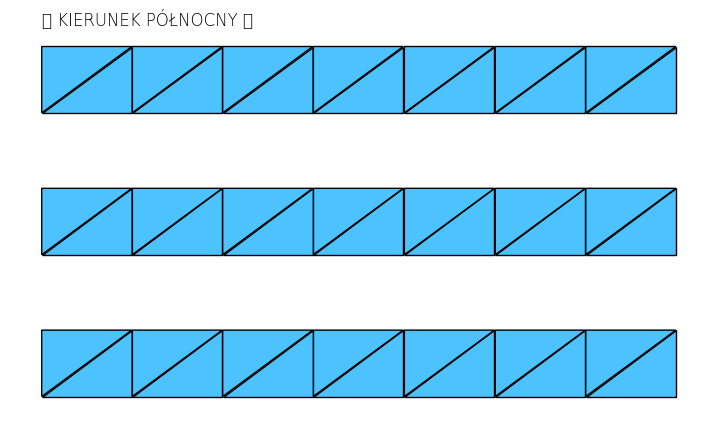


>   Wyjściowy do procesu projektowania układ paneli PV.


In [ ]:
plt.figure(figsize=(PLOT_WIDTH, 5))
plt.plot()
color = (0.0, 0.667, 1.0, 0.7)

minx = sys.float_info.max
maxx = sys.float_info.min
miny = sys.float_info.max
maxy = sys.float_info.min
polygons = []
for panel in SETUP["panels"]:
    for vertex in panel["vertexes"]:
        vertexes2d = []
        for i in range(0, 3):
            x = vertex[i][0]
            y = vertex[i][1]
            minx = min(minx, x)
            maxx = max(maxx, x)
            miny = min(miny, y)
            maxy = max(maxy, y)
            vertexes2d.append([x, y])
        polygons.append(vertexes2d)

meanx = (maxx + minx) / 2
meany = (maxy + miny) / 2
minx = sys.float_info.max
maxy = sys.float_info.min
for polygon in polygons:
    vertexes2d = []
    for i in range(0, 3):
        x = polygon[i][0] - meanx
        y = polygon[i][1] - meany
        minx = min(minx, x)
        maxy = max(maxy, y)
        vertexes2d.append([x, y])

    p = plt.Polygon(vertexes2d, color=color, ls="-", lw=1, ec=(0, 0, 0))
    plt.gca().add_patch(p)

plt.text(
    minx, maxy, "\N{Upwards Double Arrow} KIERUNEK PÓŁNOCNY \N{Upwards Double Arrow}\n")

plt.axis('off')
plt.show()

display(md("""
>   Wyjściowy do procesu projektowania układ paneli PV.
"""
))

In [ ]:
group_list = ""
for (azimuth, elevation), group in GROUPS.items():
    energy = ru.yearly_panel_production(azimuth, elevation)
    group_list += f"* {group.label()}: {round(energy, -2):.0f}kWh/rok\n"


display(md(f"""
Średnio-rocznych wydajność dachowej instalacji PV zależy od lokalnych warunków meteorologicznych, od konstrukcji dachu i od otoczenia budynku, jeśli to może zacieniać panele instalacji.

Wydajność może być szacowana na podstawie lokalnej wartości *potencjału fotowoltaicznego* \N{EN DASH} parametru uwzględniającego lokalizację geograficzną \N{EN DASH} oraz podstawowych parametrów konstrukcji dachu \N{EN DASH} kierunku i nachylenia. W rozważanym przypadku roczna produkcja od jednego panelu na kolejnych połaciach dachu ma następujące wartości:

{group_list}

Dla porównania, maksymalna roczna produkcja panela zainstalowanego w idealnych warunkach wynosi:

* kierunek południowy, nachylenie 47\N{DEGREE SIGN}: {round(ru.yearly_panel_production(180, 43), -2):.0f}kWh/rok
"""))


Średnio-rocznych wydajność dachowej instalacji PV zależy od lokalnych warunków meteorologicznych, od konstrukcji dachu i od otoczenia budynku, jeśli to może zacieniać panele instalacji.

Wydajność może być szacowana na podstawie lokalnej wartości *potencjału fotowoltaicznego* – parametru uwzględniającego lokalizację geograficzną – oraz podstawowych parametrów konstrukcji dachu – kierunku i nachylenia. W rozważanym przypadku roczna produkcja od jednego panelu na kolejnych połaciach dachu ma następujące wartości:

* kierunek południowy, nachylenie 30°: 500kWh/rok


Dla porównania, maksymalna roczna produkcja panela zainstalowanego w idealnych warunkach wynosi:

* kierunek południowy, nachylenie 47°: 600kWh/rok


## Dostępność światła słonecznego

Seria wykresów pokazuje mapy rocznego uzysku energii od poszczególnych paneli instalacji przy równych konfiguracjach paneli. 

Liczby przypisane panelom wskazują wartość rocznej produkcji [kWh] i procent od maksymalnej produkcji z panela o danej orientacji. Wartość procentu mniejsza od 100% świadczy o zacienieniu panela.


In [ ]:
def energy_map(energy_dict, included_only=False):
    panels = SETUP[setup.PANELS]
    included = setup.get_included_panels()
    panel_day_prod_map = energy_dict[ru.PANELS]
    
    def sort_days(day):
        return int(day)
    
    open_production = {}
    shaded_production = {}
    # print(f'pv_potential_factor: {ru.pv_potential_factor()}')

    for panel in panels:
        _indexes = tuple(panel[setup.INDEXES])
        open_energy = 0
        shaded_energy = 0
        
        day_list = list(panel_day_prod_map[str(_indexes)])
        day_list.sort(key=sort_days)
        prods = panel_day_prod_map[str(_indexes)]
        
        prev_day = int(day_list[0]) - (int(day_list[1]) - int(day_list[0]))
        for day in day_list:
            prod = prods[day]
            delta = int(day) - prev_day
            open_energy += prod[ru.OPEN_ENERGY] * delta \
                * ru.pv_potential_factor()
            shaded_energy += prod[ru.SHADED_ENERGY] \
                * delta * ru.pv_potential_factor()
            prev_day = int(day)
        
        open_production[_indexes] = open_energy
        shaded_production[_indexes] = shaded_energy
    
    panel_prod_values = list(shaded_production.values())
    min_prod = min(panel_prod_values)
    max_prod = max(panel_prod_values)
    
    ALPHA = 0.7
    WIDTH = PLOT_WIDTH + 1
    HEIGHT = 7

    def normalize(value):
        return (value - min_prod) / (max_prod - min_prod)

    cmap = plt.get_cmap('RdYlBu_r')
    norm = mpl.colors.Normalize(vmin=min_prod, vmax=max_prod)

    fig, disply = plt.subplots(figsize=(WIDTH, HEIGHT))
    disply.plot()

    # sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
    # sm.set_array([])
    # fig.colorbar(sm)

    minx = sys.float_info.max
    maxy = sys.float_info.min

    total_open = 0
    total_shaded = 0

    for panel in panels:
        is_included = True
        if included_only and not panel[setup.INDEXES] in included:
            is_included = False
        _indexes = tuple(panel[setup.INDEXES])

        vertexes = panel[setup.VERTEXES]
        open = open_production[tuple(panel[setup.INDEXES])]
        shaded = shaded_production[tuple(panel[setup.INDEXES])]
        total_open += open
        total_shaded += shaded
        x0 = 0
        y0 = 0
        for vertex in vertexes:
            vertexes2d = []
            for i in range(0, 3):
                x = vertex[i][0]
                x0 += x
                y = vertex[i][1]
                y0 += y
                minx = min(minx, x)
                maxy = max(maxy, y)
                vertexes2d.append([x, y])
            color = cmap(normalize(shaded)) if is_included else (1, 1, 1)
            disply.add_patch(
                plt.Polygon(
                vertexes2d, color=color, alpha=ALPHA, ls="-", lw=0, 
                    ec=(0, 0, 0)))
        if is_included:
            disply.text(x0/6, y0/6, "%.0f, %.0f%%" % (shaded, 100 * shaded / 
                open), rotation='vertical')

    disply.text(
        minx, maxy, "\N{Upwards Double Arrow} KIERUNEK PÓŁNOCNY \N{Upwards Double Arrow}\n")


    disply.axis('off')
    plt.show()

    return (
        total_open, total_shaded,
        energy_dict[ru.MAX_POWER][ru.OPEN_POWER],
        energy_dict[ru.MAX_POWER][ru.SHADED_POWER]
    )

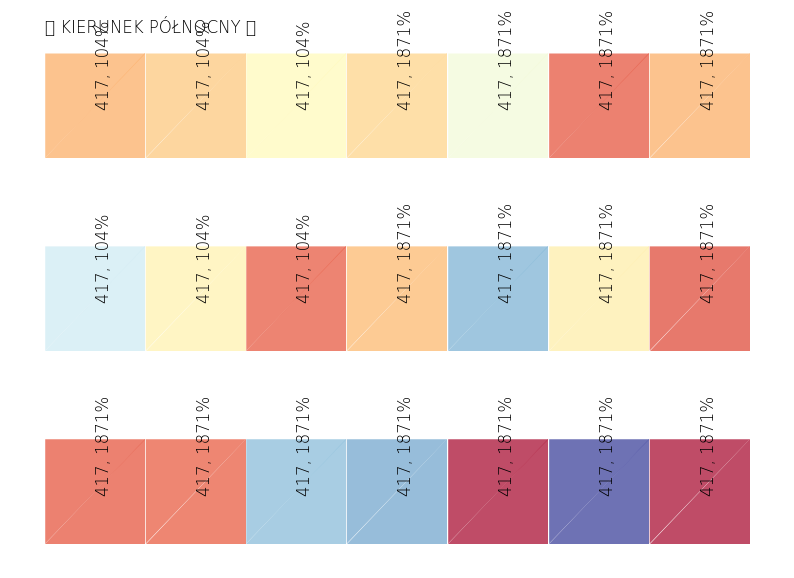

> 
Panele są ułożone w grupach:

* kierunek południowy, nachylenie 0°: 21 moduły(ów).


Efektywność instalacji:

* roczna produkcja energii: 8700kWh
* szczytowa moc oddana do invertera: 9kW


In [ ]:
panel_layout('kubusia_00_2100')
PV.condition_measurement()

(total_open, total_shaded, 
    max_power_open, max_power_shaded) = energy_map(ru.Energy(PV).dict)

text = ""
for (azimuth, elevation), group in GROUPS.items():
    text += "* %s\n" % (group)

display(md(f"""> 
Panele są ułożone w grupach:

{text}

Efektywność instalacji:

* roczna produkcja energii: {round(total_shaded / 100) * 100:.0f}kWh
* szczytowa moc oddana do invertera: {max_power_shaded:.0f}kW
"""))

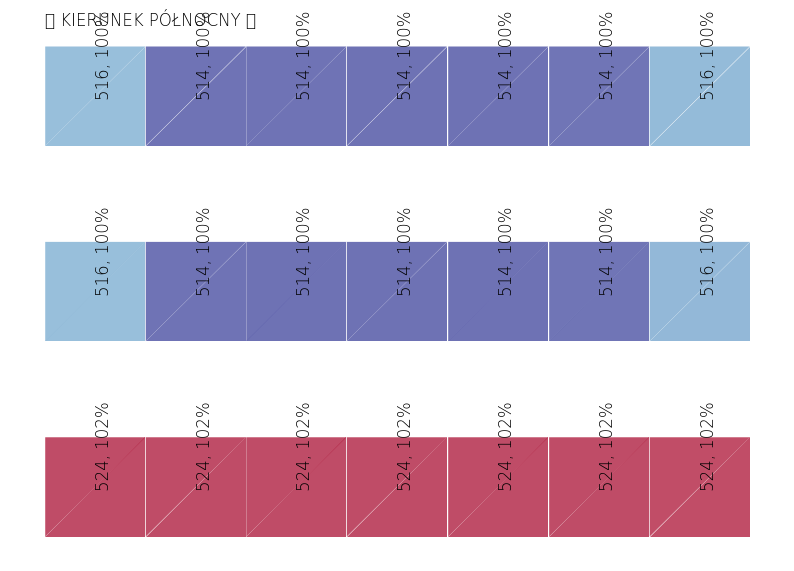

> 
Panele są ułożone w grupach:

* kierunek południowy, nachylenie 20°: 21 moduły(ów).

Efektywność instalacji:

* roczna produkcja energii: 10900kWh
* szczytowa moc oddana do invertera: 10kW


In [ ]:
panel_layout('kubusia_20_2100')
PV.condition_measurement()

(total_open, total_shaded, 
    max_power_open, max_power_shaded) = energy_map(ru.Energy(PV).dict)

text = ""
for (azimuth, elevation), group in GROUPS.items():
    text += "* %s\n" % (group)

display(md(f"""> 
Panele są ułożone w grupach:

{text}
Efektywność instalacji:

* roczna produkcja energii: {round(total_shaded / 100) * 100:.0f}kWh
* szczytowa moc oddana do invertera: {max_power_shaded:.0f}kW
"""))

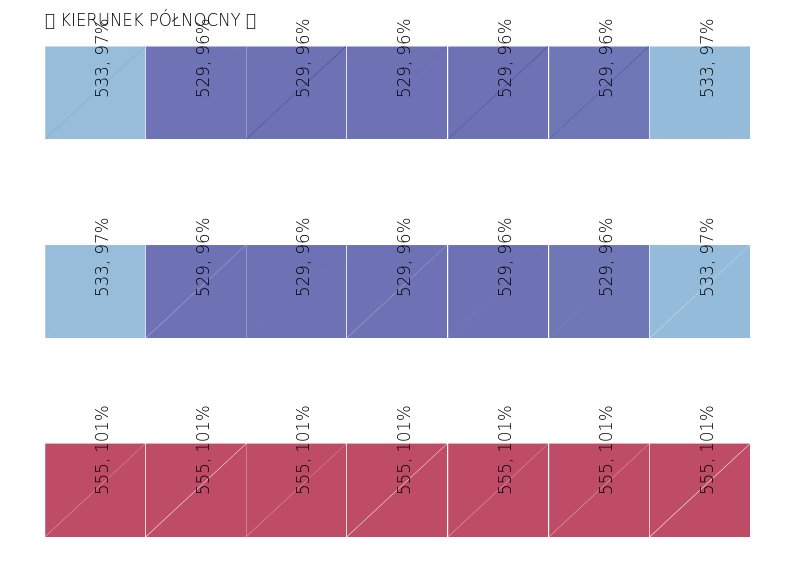

> 
Panele są ułożone w grupach:

* kierunek południowy, nachylenie 30°: 21 moduły(ów).

Efektywność instalacji:

* roczna produkcja energii: 11300kWh
* szczytowa moc oddana do invertera: 10kW


In [ ]:
panel_layout('kubusia_30_2100')
PV.condition_measurement()

(total_open, total_shaded, 
    max_power_open, max_power_shaded) = energy_map(ru.Energy(PV).dict)

text = ""
for (azimuth, elevation), group in GROUPS.items():
    text += "* %s\n" % (group)

display(md(f"""> 
Panele są ułożone w grupach:

{text}
Efektywność instalacji:

* roczna produkcja energii: {round(total_shaded / 100) * 100:.0f}kWh
* szczytowa moc oddana do invertera: {max_power_shaded:.0f}kW
"""))

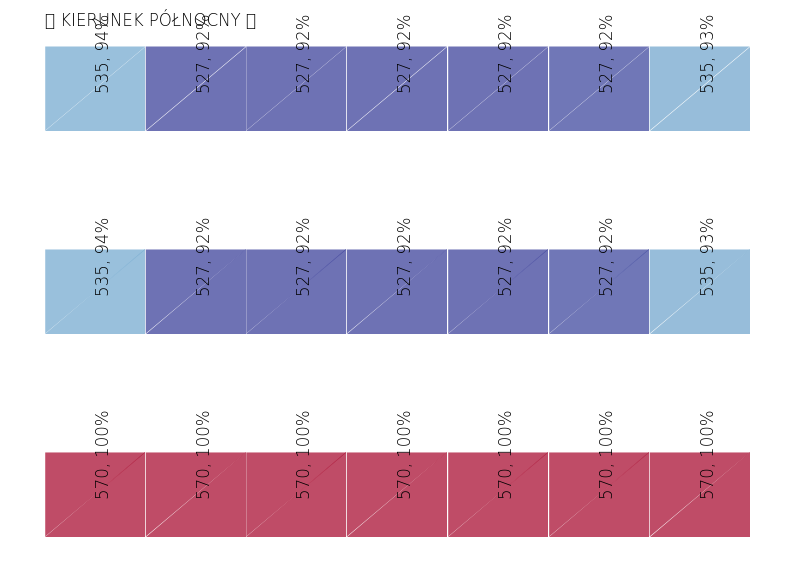

> 
Panele są ułożone w grupach:

* kierunek południowy, nachylenie 40°: 21 moduły(ów).

Efektywność instalacji:

* roczna produkcja energii: 11400kWh
* szczytowa moc oddana do invertera: 10kW


In [ ]:
panel_layout('kubusia_40_2100')
PV.condition_measurement()

(total_open, total_shaded, 
    max_power_open, max_power_shaded) = energy_map(ru.Energy(PV).dict)

text = ""
for (azimuth, elevation), group in GROUPS.items():
    text += "* %s\n" % (group)

display(md(f"""> 
Panele są ułożone w grupach:

{text}
Efektywność instalacji:

* roczna produkcja energii: {round(total_shaded / 100) * 100:.0f}kWh
* szczytowa moc oddana do invertera: {max_power_shaded:.0f}kW
"""))

In [ ]:
panel_layout(PANEL_LAYOUT)

PV.condition_measurement_nogreen()
energy_dict = ru.Energy(PV).dict
if len(energy_dict[ru.TOTALS]) > 0:
    

    display(md(f"""### Bez wielkich drzew
    """))

    (total_open, total_shaded, 
        max_power_open, max_power_shaded) = energy_map(ru.Energy(PV).dict)

    display(md(f"""> Mapa rocznego uzysku energii od poszczególnych paneli instalacji. Liczby przypisane panelom wskazują wartość rocznej produkcji i procent od maksymalnej produkcji z panela o danej orientacji ale bez pomniejszenia od zasłaniających wielkich drzew.

Bez wielkich drzew mogących zacieniać panele PV, rezultaty instalacji są następujące:

* roczna produkcja energii: {round(total_shaded / 100) * 100:.0f}kWh
* szczytowa moc oddana do invertera: {max_power_shaded:.0f}kW
    """))



## Projekt instalacji

Założeniem projektu jest, że roczna produkcja energii wynosi 10000kWh przy najmniejszej wystarczającej liczbie paneli.
    


Przy założeniach projektu oczekiwana roczna produkcja energii wynosi 11300kWh/rok. Poniższy wykres pokazuje wybrane panele.


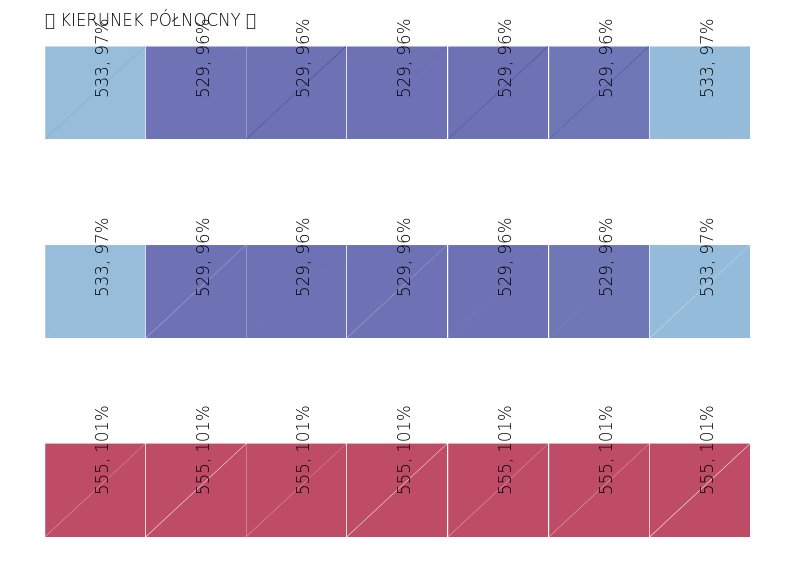


Panele wybrane do instalacji.

Panele są ułożone w grupach:
           
* kierunek południowy, nachylenie 30°: 21 moduły(ów).



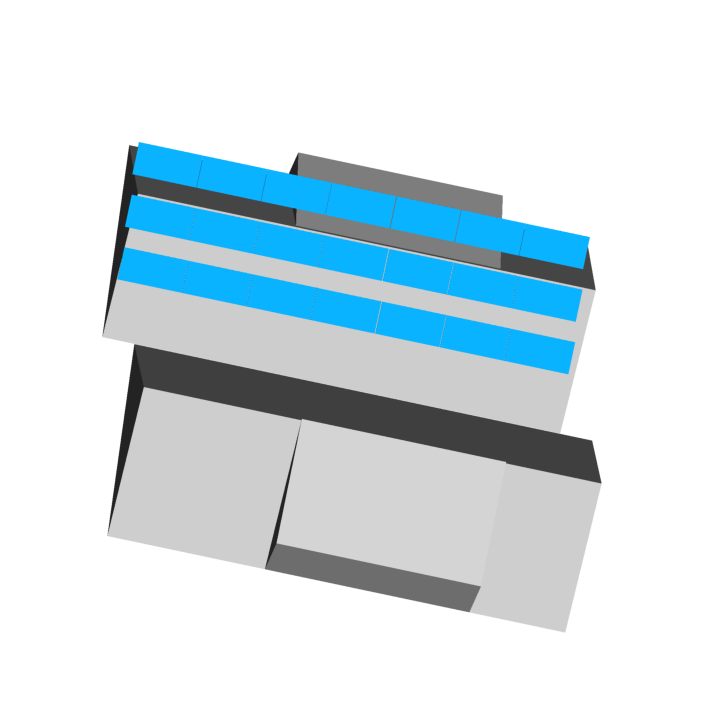


>   Dach budynku instalacji. Projekt uwzględnia zacienienie od sąsiedniego dachu. Pobliskie wysokie drzewa – zielone obiekty – są włączone do modelu. Nasłonecznienie z dnia 21 miesiąca 6 o godzinie 11.


In [ ]:
panel_layout(PANEL_LAYOUT)

design = setup.get_design()
panel_groups = "panel groups"
panel_count = "panel_count"
production = "energy_production"
PV.condition_measurement()

if panel_groups in design and design[panel_groups]:
    _production = ru.best_panels(
        ru.Energy(PV).dict, groups=design[panel_groups])
    
    display(md(f"""Założeniem projektu jest, że roczna produkcja energii wynosi {DESIGN["energy_production"]:.0f}kWh przy najmniejszej wystarczającej liczbie paneli.
    """))
elif panel_count in design and design[panel_count]:
    _production = ru.best_panels(ru.Energy(PV).dict, count=design[panel_count])

    display(md(f"""Założeniem projektu jest, że instalacja jest złożona z {design[panel_count]} najlepiej pracujących paneli.
    """))
elif production and design[production]:
    _production = ru.best_panels(
        ru.Energy(PV).dict, production=design[production])

    display(md(f"""Założeniem projektu jest, że instalacja jest złożona z najlepiej pracujących paneli w liczbie wystarczającej do osiągnięcia założonej produkcji o wartości {round(design["energy_production"], -2):.0f}kWh.
    """))

display(md(f"""
Przy założeniach projektu oczekiwana roczna produkcja energii wynosi {round(_production, -2):.0f}kWh/rok. Poniższy wykres pokazuje wybrane panele.
"""))

PV.condition_measurement()

(total_open, total_shaded, 
    max_power_open, max_power_shaded) = energy_map(
        ru.Energy(PV).dict, included_only=True)

text = ""
for (azimuth, elevation), group in GROUPS.items():
    text += "* %s\n" % (group)

display(md(f"""
Panele wybrane do instalacji.

Panele są ułożone w grupach:
           
{text}
"""))

fig = plt.figure(figsize=(PLOT_WIDTH, PLOT_WIDTH))
PV.condition_setup_final_view()
img = mpimg.imread(os.path.join(projectfiles.images_folder(), 'installation.png'))
plt.axis('off')
plt.imshow(img)
plt.show()

display(md(f"""
>   Dach budynku instalacji. Projekt uwzględnia zacienienie od sąsiedniego dachu. Pobliskie wysokie drzewa \N{EN DASH} zielone obiekty \N{EN DASH} są włączone do modelu. Nasłonecznienie z dnia 21 miesiąca 6 o godzinie 11.
"""))